In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Employee.csv')
df=data.copy()
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df['JoiningYear']=2019-df['JoiningYear']

In [5]:
df.rename(columns={'JoiningYear':'YearsWork'},inplace=True)

In [6]:
df.describe(include='all')

,Education,YearsWork,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,3.937030,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,1.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,4.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,6.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [7]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Education[object],1. Bachelors2. Masters3. PHD,"3,601 (77.4%)873 (18.8%)179 (3.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQWrqYBiF4S9Fyu0kQQQX4yLuYruI7EbEf9CWTtLB5c7ajpLzB3yeFXzgqxLxDMuyFCQ89T6AxzFU1UtVPfc+hM18Lsvy3vuIqqrD6XT6O47jsfchbKO1dhuG4XUPwR3GcTxeLpf3aZo+eh/Duu73+595no/X6/W5qvrHVlU1TdPH+Xx+630Mm3jpfcB/HhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEXOo+ve/p96HsL69va6H1tptnudj7eh/T6yntXarqs/ed1TZIDyC3WwQBlM+Unp9su3m3UZOl3XVnhY/5MTXVXtb/JDTa13lyfcB+VGXGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzHxddXeFj/kdFlX7WnxQ44NAjHWVcR4QCDmt69RX3Ws6scpn7kda/t2ymduxxZ+m/KZ27EqDwjEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiPl2ymduxxZ+nPKZ27E2GwRiTPmI+QJKvKNKRU1XrgAAAABJRU5ErkJggg=="">",0(0.0%)
2,YearsWork[int64],1. 22. 43. 54. 65. 36. 77. 1,"1,108 (23.8%)781 (16.8%)699 (15.0%)669 (14.4%)525 (11.3%)504 (10.8%)367 (7.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC2UlEQVR4nO3bQWrbUABF0e9iQjuxMYEsJovoYrsI7yaEaNCGTNxBaXFNIIljXYX2nBX8weULCb3V4XAYUPi09AH4f4iNjNjIiI2M2MisxhhfxhhXSx/kxNPhcPix9CG4rPX19fXXzWazW/ogx6Zpul+tVt8E929Zbzab3e3t7Y/tdvu49GHGGOPh4eHzfr/f3d3dXY0xxPYPWY8xxna7fby5ufm+9GGOfFn6AFyeFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy6zF+/daz9EF++0hn4bLW0zTd7/f73fhAv/VM03Q/xnha+hxclt/Cyaws4qmUN5vb6j+XDV6MWEgGL0YsjNEOXj7M2y7L8FGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIJOsqiynGCNdVFlPYIJCxriIz983mNuOPWddVFlUcm21dZVHFqbnXVRZV/OGjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nZBi9GLpyadfBi5MIxv4WTMXgh4wWBzJyPUY9Q/jLbusqyilOzrKssq3jOnOsqyyr+4gWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzCzrKssqnjPbusqyilN+CydjXUXmUjebW4wXXWTwYtzCa7x78GLcwmtdavBi3MKLfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj8+7Bi3ELr3WRwYtxC6/ht3AyBi9kvCCQ8RglY11FxrqKjHUVGS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkfFbOBnrKjLn3GxuMc7y5sGLcQvnetPgxbiF9zhn8GLcwll81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJvWldZUvEeb15XWVJxLhsEMtZVZLwgkBEbGbGRERuZn9wreRUTCdYjAAAAAElFTkSuQmCC"">",0(0.0%)
3,City[object],1. Bangalore2. Pune3. New Delhi,"2,228 (47.9%)1,268 (27.3%)1,157 (24.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQWrbYBSF0aciQjORMAYvxovoYrsI7cYYa9CETNRB5yVNwtX/q+es4GE+bCR8h23bChK+7X0A/4+hqp6r6mnvQzrwtm3by95H9Gw8n88/pmk67X1I69Z1vQ/D8FNwHzdO03S6Xq8v8zy/7n1Mqx6Px/dlWU632+2pqsT2QWNV1TzPr5fL5dfexzTuee8DeucBgRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxY9Wf/2vtfUjLfD5fY1zX9b4sy6n8X+uv1nW9V9Xb3nf0zAbh/WwQPmkw5SOlp2823yyd62ZdZd3Uvy7WVdZNx9DTusrTcue81CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGTBfrqtbv4326WVdZN/XPBoEY6ypiPCAQ0/rPqJ/OA2l6yme+dyzNTvnM946n9Slf069j+DceEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER0+yUr8Wb+Jymp3zme8dig0CMKR8xvwFKvKNK5apapwAAAABJRU5ErkJggg=="">",0(0.0%)
4,PaymentTier[int64],1. 32. 23. 1,"3,492 (75.0%)918 (19.7%)243 (5.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABnElEQVR4nO3bQWrbUBSF4atiQjORMAYvJovoYrsI7cYYa9CETNRBp2liyOO8R/J9K7jg3zYyPtO+7wUJP3ofwPcxVdVjVT30PoRmXvd9f+59xFsOp9Pp1zzPx96H0Ma2bddpmn6PGNxhnufj09PT87IsL72P4XNut9vPdV2Pl8vloarGi62qalmWl/P5/Kf3MTTx2PuA//GAQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2YQ9W//0H1PoTPG/11PGzbdl3X9VgD/w+K+23bdq2q1953vMUG4esZdoMwmfKR0vuTbdh3Ie11XVeNvASivW7rqtGXQLTXe13lCfgb8aMuMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmK6ratGXwLRXtd11chLINqzQSDGuooYDwjE3PM16quOJj6c8pnb0cq7Uz5zO1q6Z8pnbkcTHhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEfPulM/cjpY+nPKZ29GKDQIxpnzE/AVK

In [8]:
def classify(data,col,values):
  for i,val in enumerate(values):
     data.loc[data[col] == val,[col]] =i+2
  df[col]=pd.to_numeric(data[col]) 

In [9]:
classify(df,'Education',df['Education'].unique())
classify(df,'City',df['City'].unique())
classify(df,'Gender',df['Gender'].unique())
classify(df,'EverBenched',df['EverBenched'].unique())
df

,Education,YearsWork,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,2,2,2,3,34,2,2,0,0
1,2,6,3,1,28,3,2,3,1
2,2,5,4,3,38,3,2,2,0
3,3,3,2,3,27,2,2,5,1
4,3,2,3,3,24,2,3,2,1
...,...,...,...,...,...,...,...,...,...
4648,2,6,2,3,26,3,2,4,0
4649,3,6,3,2,37,2,2,2,1
4650,3,1,4,3,27,2,2,5,1
4651,2,7,2,3,30,2,3,2,0


In [10]:
df.dtypes

Education                    int64
YearsWork                    int64
City                         int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

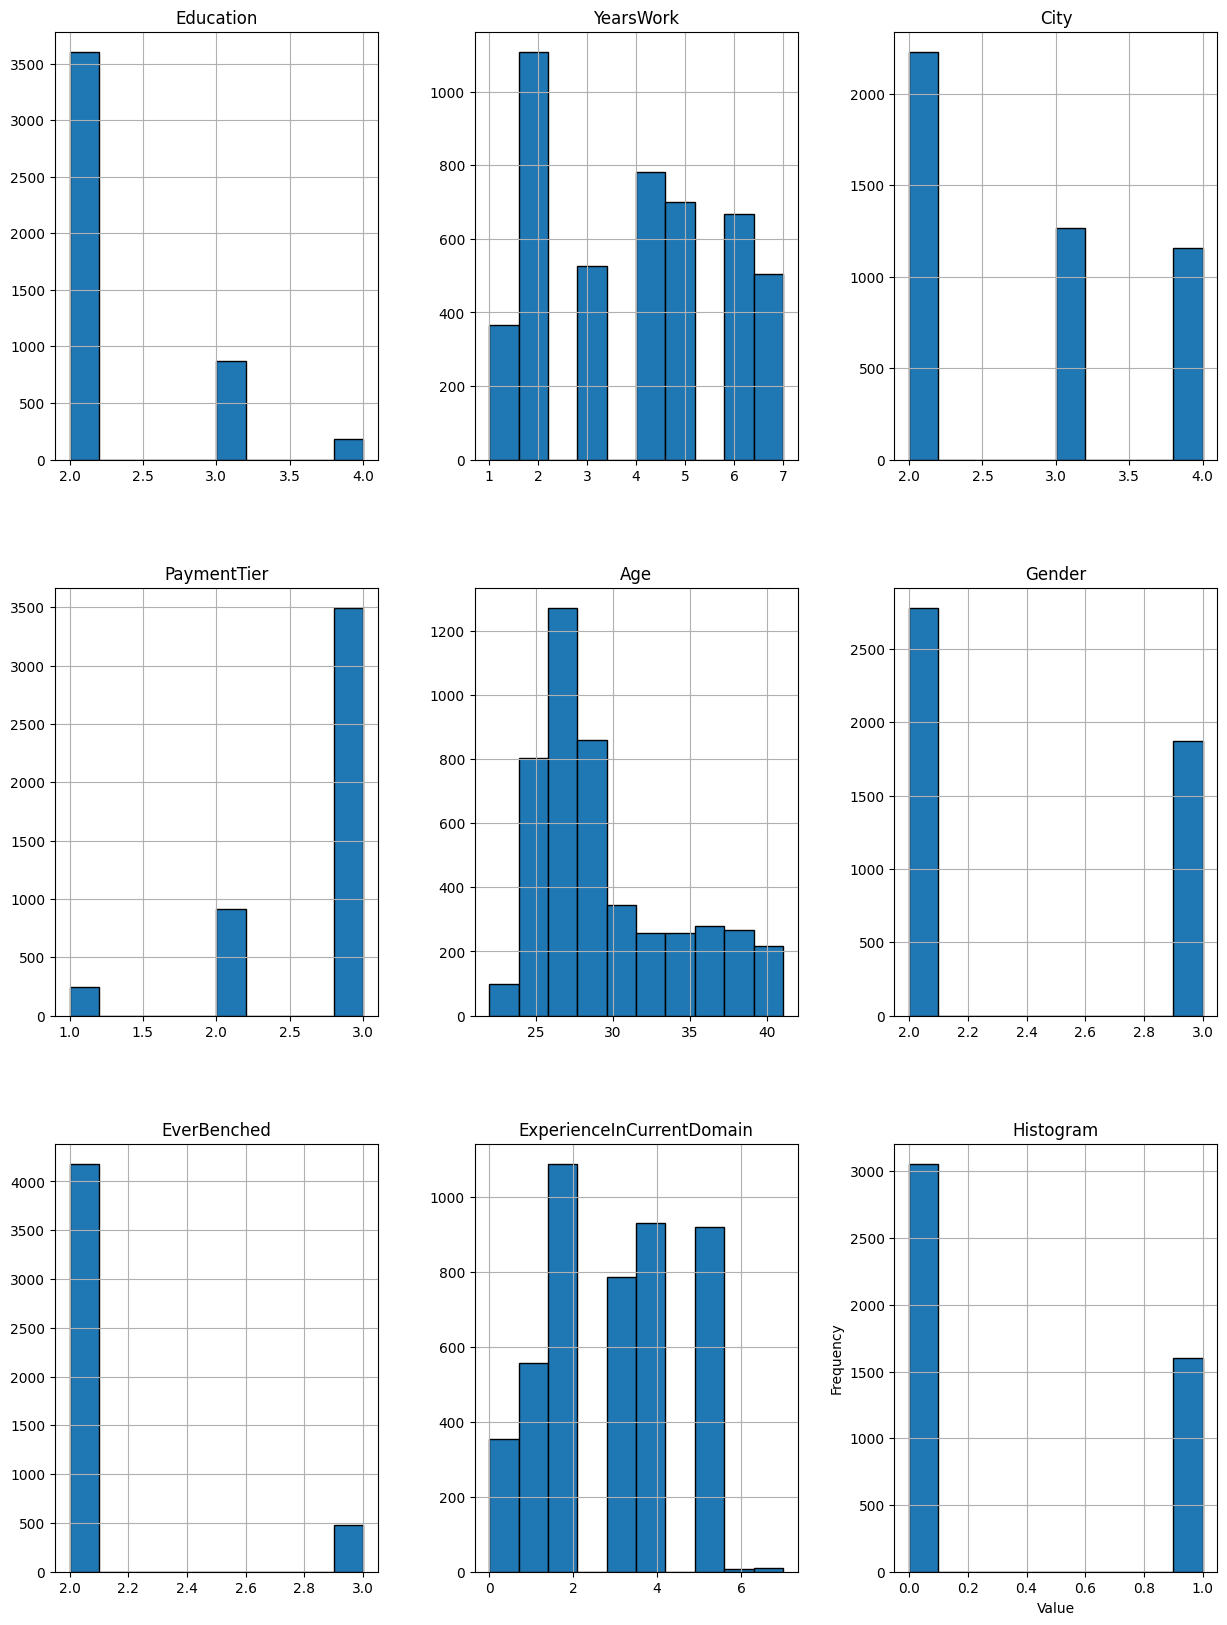

In [11]:
#create histogram
df.hist(bins = 10, edgecolor = 'black', figsize = (15, 20))

#add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

#show plot
plt.show()

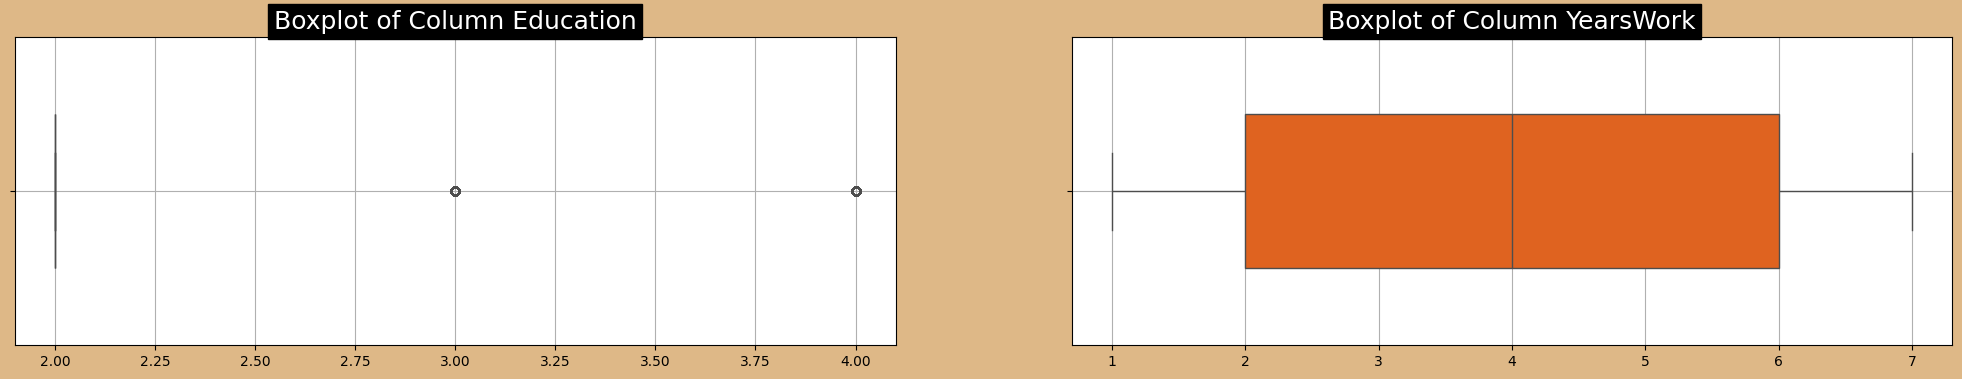

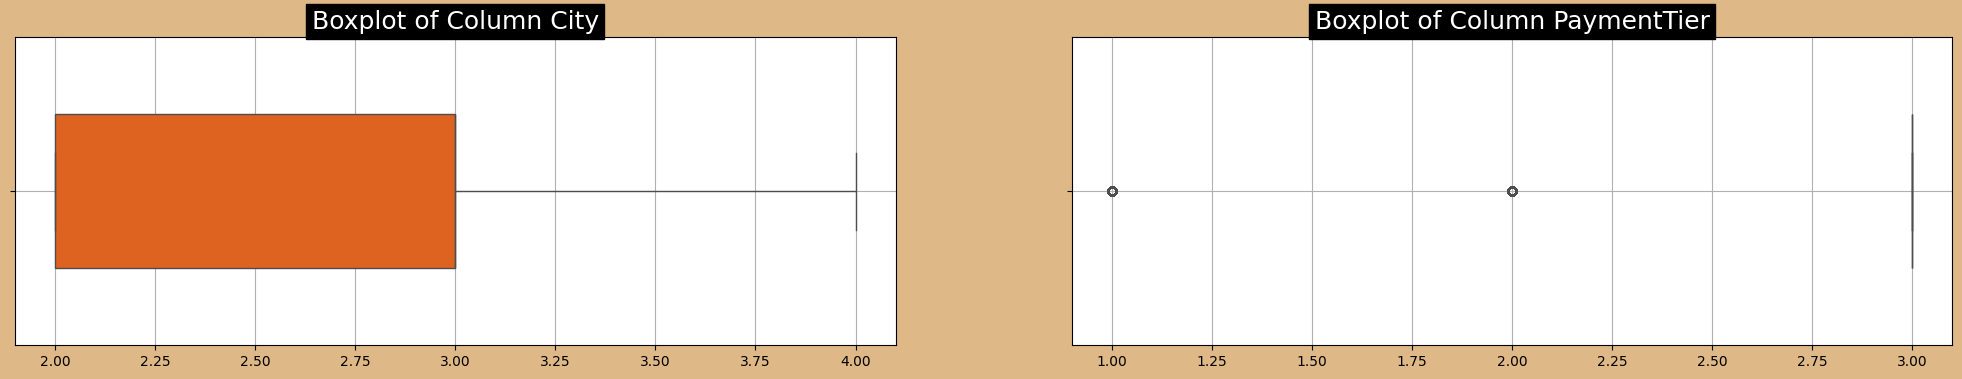

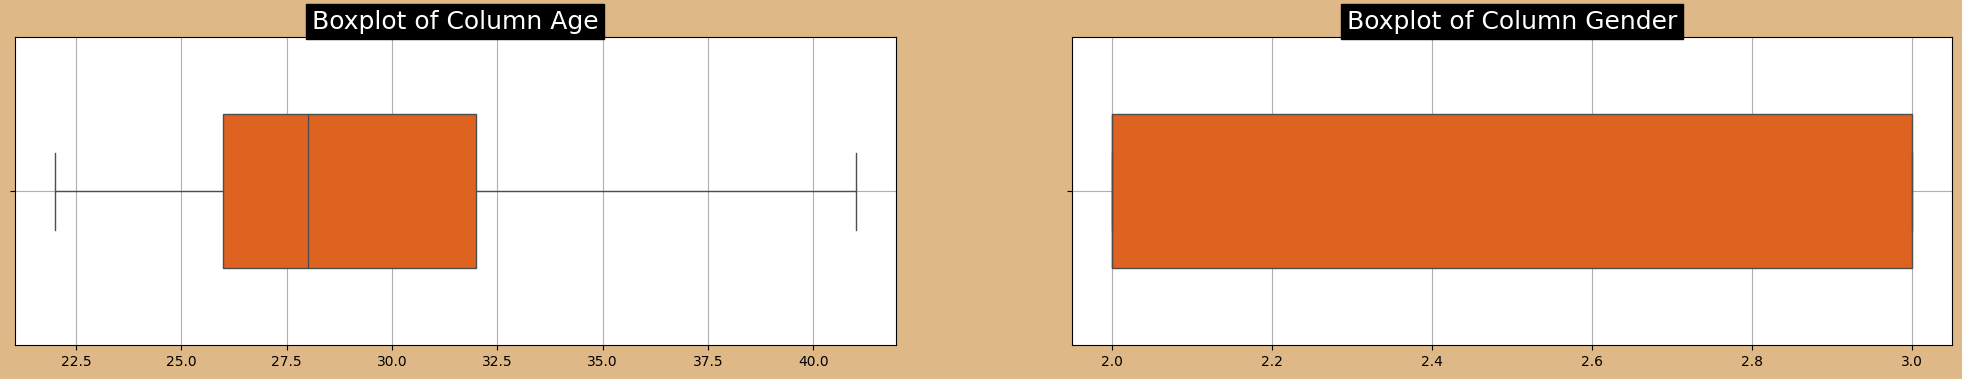

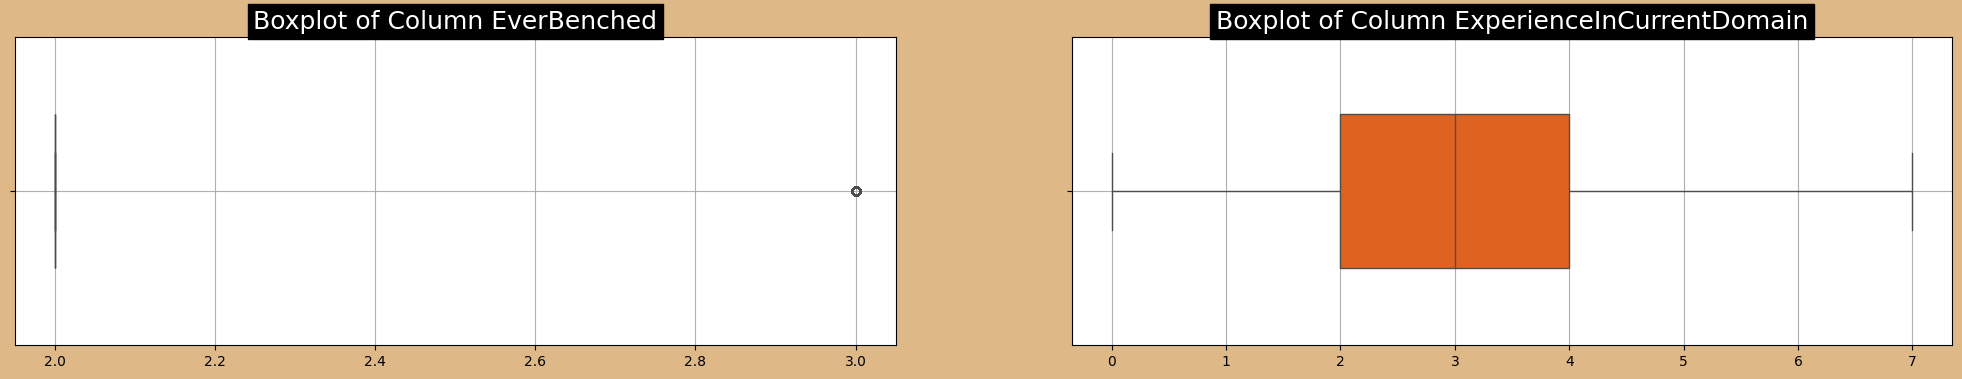

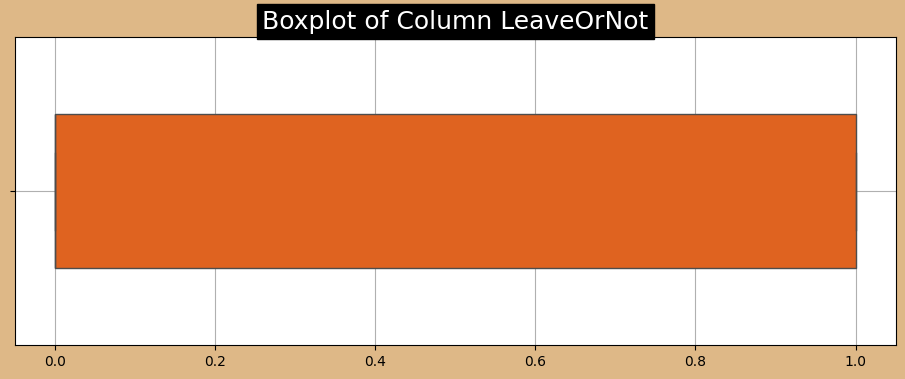

In [12]:
import warnings
warnings.filterwarnings('ignore')
df_box = df.columns
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='burlywood')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('white')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('white')
        plt.grid()
        i += 1

    plt.show()

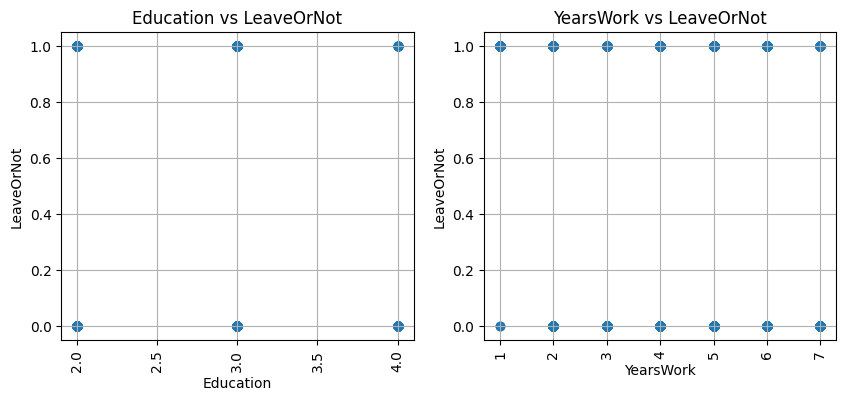

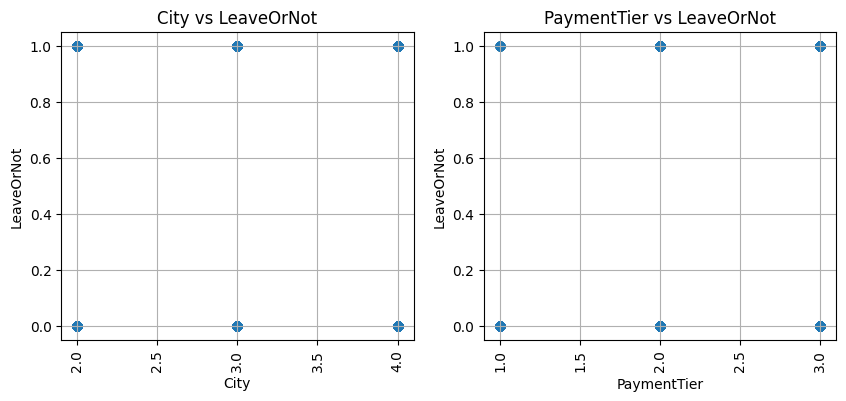

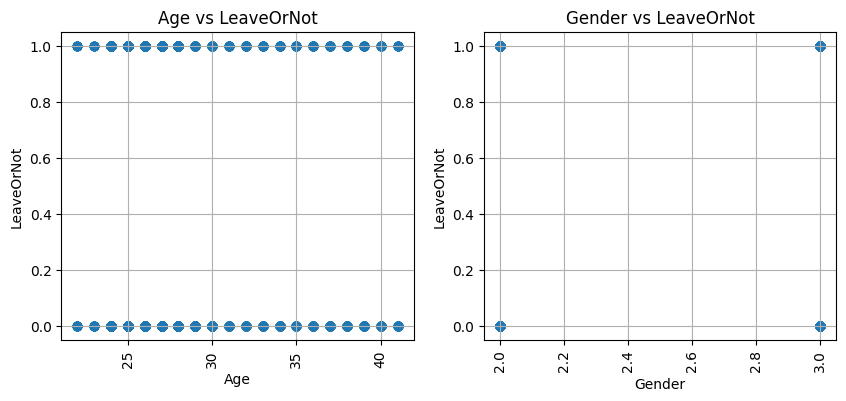

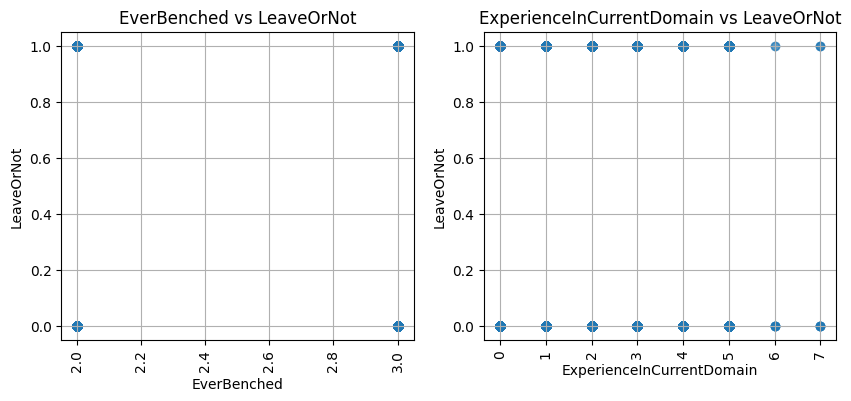

IndexError: list index out of range

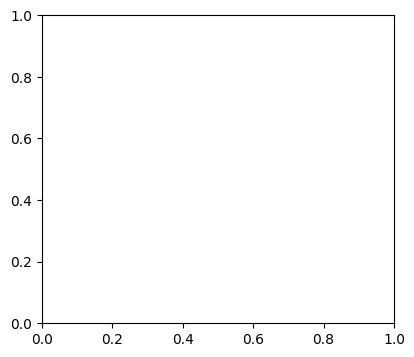

In [13]:
target='LeaveOrNot'
scatter_plot = list (df.drop (target , axis = 1))               
i =  0
while i < 20:
    plt.figure (figsize = [10 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df [target] , alpha = .5)
    plt.title (scatter_plot [i] + " vs " +target)
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel (target)
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df [target] , alpha = .5)
    plt.title (scatter_plot [i] + " vs "+target)
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel (target)
    plt.grid ()
    i += 1
    plt.show ()

<Axes: xlabel='Education', ylabel='count'>

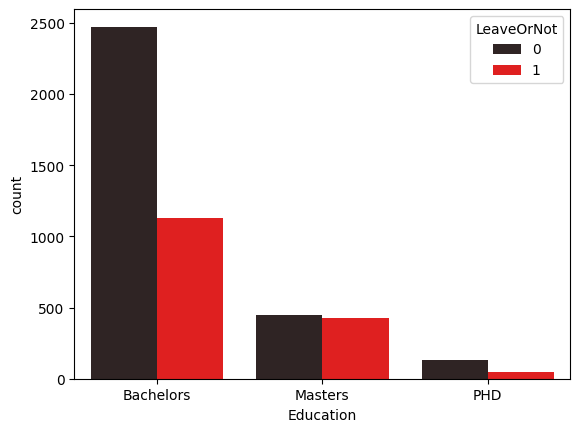

In [14]:
sns.countplot(data=data, x= data["Education"], hue="LeaveOrNot", color="red")

In [15]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


<Axes: xlabel='City', ylabel='count'>

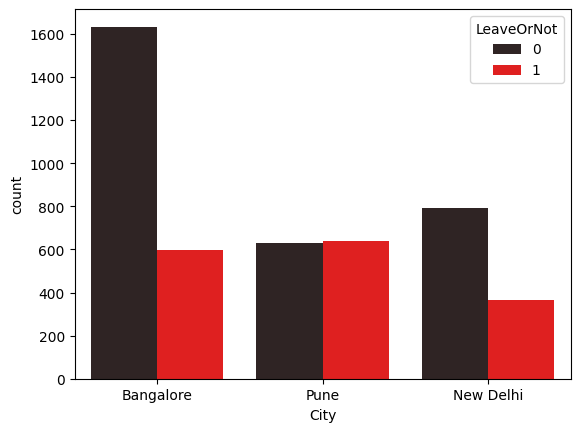

In [16]:
sns.countplot(data=data, x= data["City"], hue="LeaveOrNot", color="red")

<Axes: xlabel='Gender', ylabel='count'>

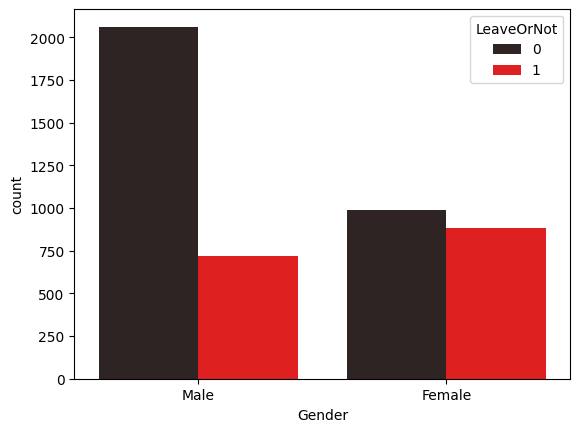

In [17]:
sns.countplot(data=data, x= data["Gender"], hue="LeaveOrNot", color="red")


<Axes: xlabel='EverBenched', ylabel='count'>

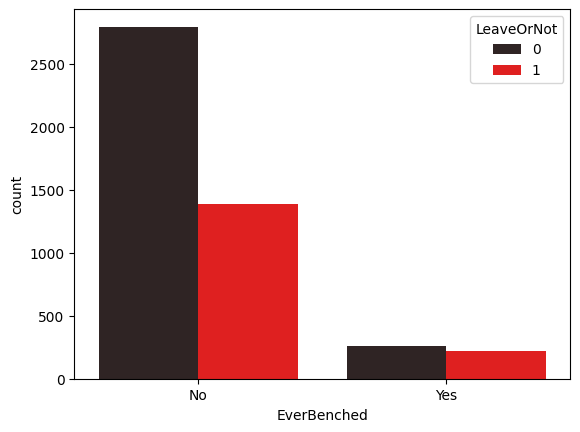

In [18]:
sns.countplot(data=data, x= data["EverBenched"], hue="LeaveOrNot", color="red")


<Axes: xlabel='JoiningYear', ylabel='Count'>

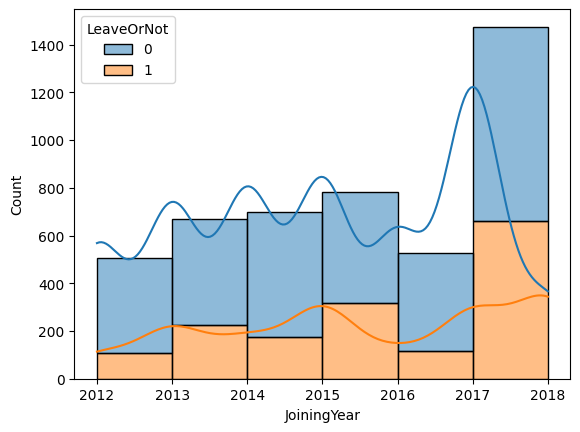

In [19]:
sns.histplot(data=data, x=data["JoiningYear"],hue="LeaveOrNot", kde=True, bins=6, multiple="stack")

<Axes: xlabel='PaymentTier', ylabel='Count'>

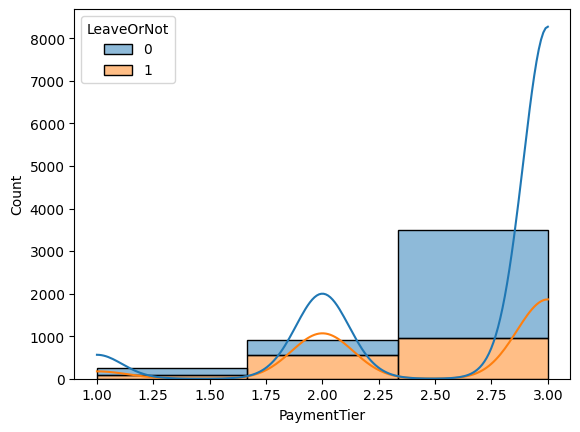

In [20]:
sns.histplot(data=data, x=data["PaymentTier"],hue="LeaveOrNot", kde=True, bins=3, multiple="stack")

<Axes: xlabel='Age', ylabel='Count'>

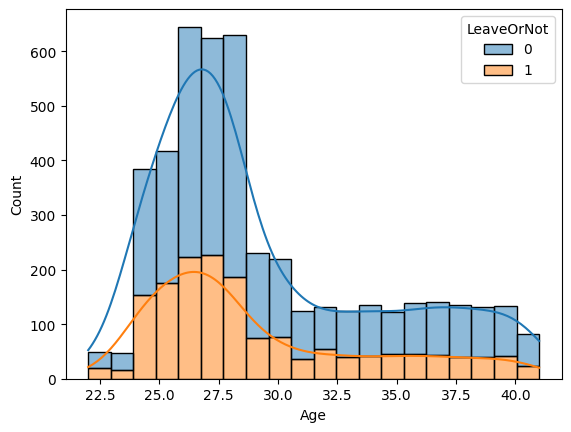

In [21]:
sns.histplot(data=data, x=data["Age"],hue="LeaveOrNot", kde=True, bins=20, multiple="stack")

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='Count'>

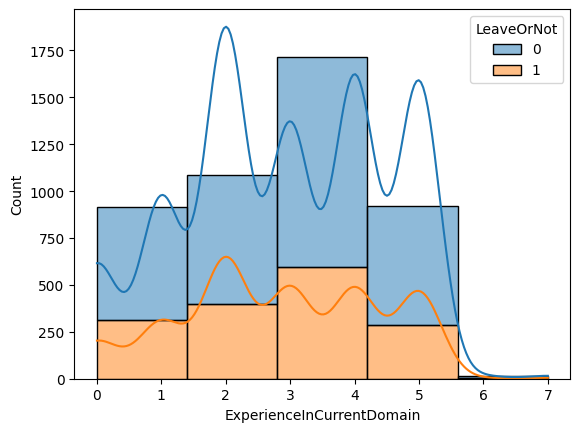

In [22]:
sns.histplot(data=data, x=data["ExperienceInCurrentDomain"],hue="LeaveOrNot", kde=True, bins=5, multiple="stack")

Text(0.5, 1.0, 'Correlation ')

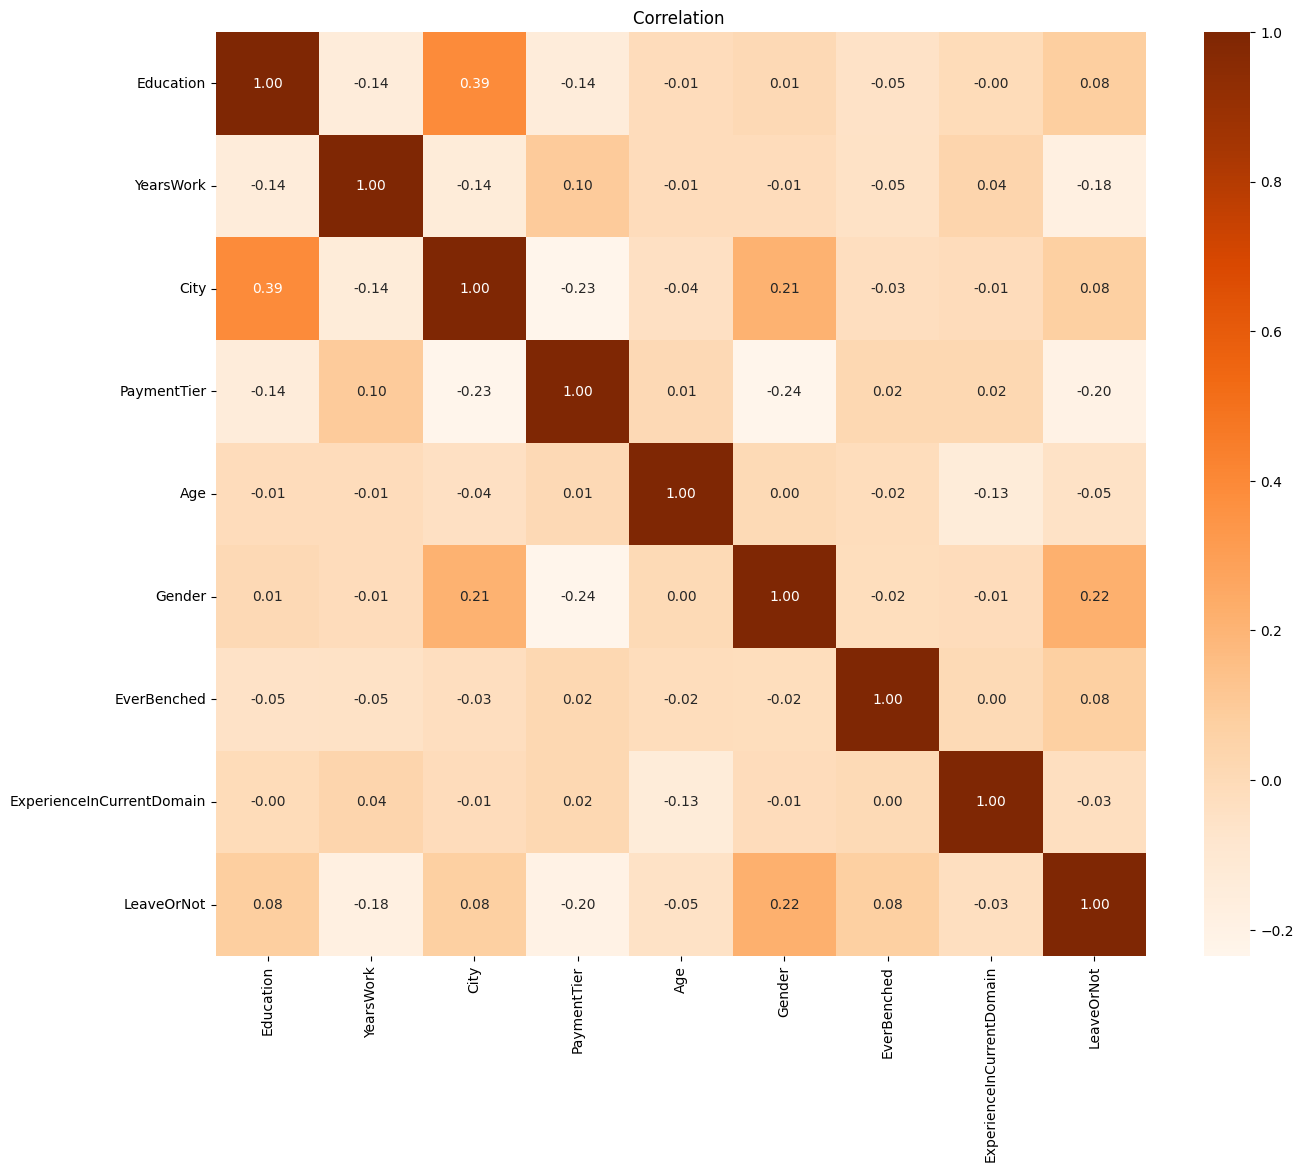

In [23]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Oranges', annot=True, fmt=".2f")
r.set_title("Correlation ")

In [24]:
pd.crosstab(data.ExperienceInCurrentDomain,data.Gender)

Gender,Female,Male
ExperienceInCurrentDomain,,
0,142,213
1,227,331
2,447,640
3,321,465
4,367,564
5,365,554
6,2,6
7,4,5


In [25]:
pd.crosstab(data.JoiningYear,data.LeaveOrNot)

LeaveOrNot,0,1
JoiningYear,,
2012,395,109
2013,445,224
2014,526,173
2015,463,318
2016,408,117
2017,811,297
2018,5,362


In [26]:
x=df.drop(columns=['LeaveOrNot'])
y=df['LeaveOrNot'].values.reshape(-1,1)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV
C = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]  
kernel = ["linear", "rbf", "poly", "sigmoid"] 
gamma = ["scale", "auto", 0.1, 0.01, 0.001, 0.0001, 1, 2]  
decision_function_shape = ["ovo", "ovr"] 
svm=SVC()
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(
    # kernel=kernel,
                                                         # C=C,
                                                         # gamma=gamma,
                                                         decision_function_shape=decision_function_shape
                                                        ))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.6529091110900996
best param:  {'decision_function_shape': 'ovo'}


In [80]:
from sklearn.svm import SVC
svm=SVC(gamma='auto')
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.8154198910862711
test accuracy: 0.8247422680412371


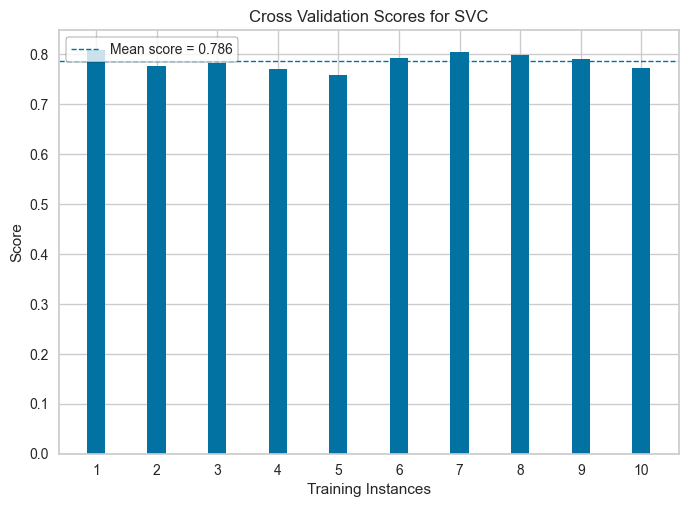

In [81]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(gamma='auto'), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_train, y_train)
oz.poof();

In [58]:
knn=KNeighborsClassifier()
grid_knn=GridSearchCV(estimator=knn,cv=5,param_grid=dict(
                                                         n_neighbors=[2,3,4,5,6,7,8,9],
                                                            weights=['uniform','distance']
                                                        ))
grid_knn.fit(x_train,y_train)
print("best score: ", grid_knn.best_score_)
print("best param: ", grid_knn.best_params_)

best score:  0.7632551294331417
best param:  {'n_neighbors': 8, 'weights': 'distance'}


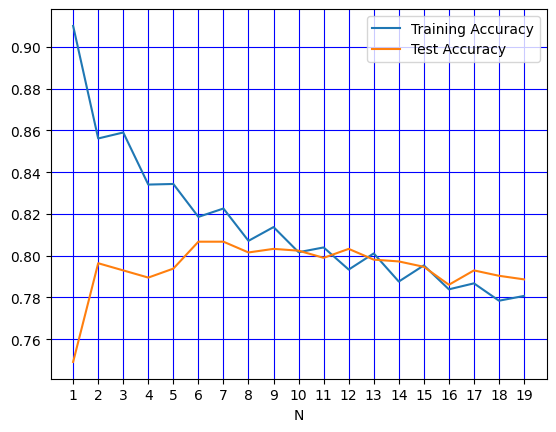

In [49]:
from sklearn.neighbors import KNeighborsClassifier
training_acc=[]
test_acc=[]

neighbors_setting=range(1,20)
for n in neighbors_setting:
    knn =KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
plt.grid( which='major', color='b', linestyle='-')
plt.plot(neighbors_setting,training_acc,label='Training Accuracy')
plt.plot(neighbors_setting,test_acc,label='Test Accuracy')
plt.xticks(range(1,20))
plt.xlabel("N")
plt.legend()
plt.show()

In [65]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')
knn.fit(x_train,y_train)
print("train accuracy:",knn.score(x_train,y_train))
print("test accuracy:",knn.score(x_test,y_test))

train accuracy: 0.9300659214674691
test accuracy: 0.8109965635738832


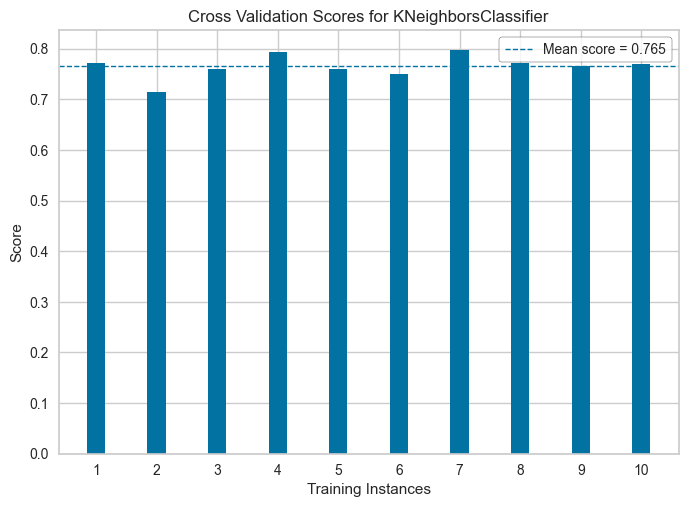

In [82]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    KNeighborsClassifier(n_neighbors=7,weights='distance'), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_train, y_train)
oz.poof();

In [66]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
grid_logreg=GridSearchCV(estimator=logreg,cv=5,param_grid=dict(
                                                       C = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10],
    penalty=['l1', 'l2', 'elasticnet', None],
    solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                                                        ))
grid_logreg.fit(x_train,y_train)
print("best score: ", grid_logreg.best_score_)
print("best param: ", grid_logreg.best_params_)

best score:  0.6807126736360909
best param:  {'C': 0.01, 'penalty': None, 'solver': 'saga'}


In [78]:
logreg=LogisticRegression(C= 5, penalty= 'l1', solver= 'saga')
logreg.fit(x_train,y_train)
print("train accuracy:",logreg.score(x_train,y_train))
print("test accuracy:",logreg.score(x_test,y_test))

train accuracy: 0.6789911149326454
test accuracy: 0.7027491408934707


In [76]:
logreg_pred=logreg.predict(x_test)

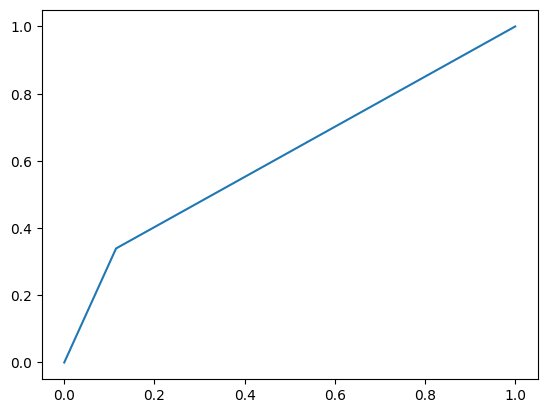

In [77]:
from sklearn.metrics import roc_curve,confusion_matrix,classification_report,ConfusionMatrixDisplay
fpr,tpr,_=roc_curve(y_test,logreg_pred)
plt.plot(fpr,tpr)

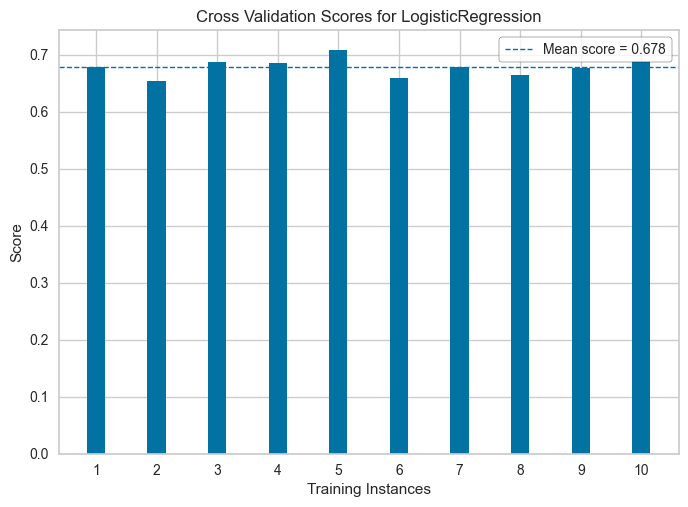

In [83]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    LogisticRegression(C= 5, penalty= 'l1', solver= 'saga'), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_train, y_train)
oz.poof();

In [91]:
n_estimators = [50, 100, 200, 300, 500]  
max_depth = [None, 10, 20, 30, 40]  
min_samples_split = [2, 5, 10]  
min_samples_leaf = [1, 2, 4]  
bootstrap = [True, False]  

param_grid = {
    'n_estimators': n_estimators,
    # 'max_depth': max_depth,
    # 'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=10,
                       verbose=0,
                       n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("Best score:", grid_rf.best_score_)
print("Best params:", grid_rf.best_params_)

Best score: 0.8469477653723283
Best params: {'bootstrap': True, 'min_samples_leaf': 4, 'n_estimators': 200}


In [96]:
rf_model= RandomForestClassifier(n_estimators= 100, max_depth=10, 
                                 min_samples_split=2,
                                 min_samples_leaf=4, 
                                 bootstrap=True, 
                                 random_state=42)
rf_model.fit(x_train, y_train)
print("train_accuracy:", rf_model.score(x_train,y_train))
print("test_accuracy: ", rf_model.score(x_test,y_test))

train_accuracy: 0.8647176841501863
test_accuracy:  0.8702749140893471


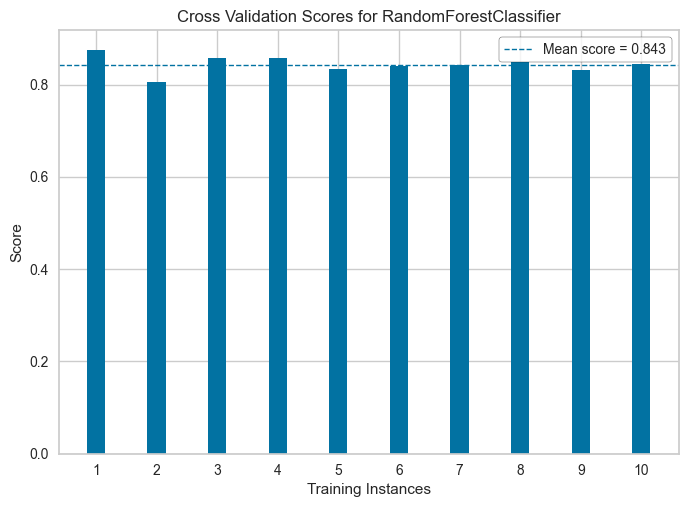

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    RandomForestClassifier(
      n_estimators= 100, max_depth=10, 
                                 min_samples_split=2,
                                 min_samples_leaf=4, 
                                 bootstrap=True, 
                                 random_state=42
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(x_train, y_train)
oz.poof();

In [99]:
param_grid = {'criterion' :['gini', 'entropy'] , 
              'max_depth' :[None, 5, 10, 20, 30, 50] , 
             'min_samples_split' : [2, 5, 10, 20] ,
             'min_samples_leaf' : [1, 2, 4, 10] 
             }  

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

grid_dt = GridSearchCV(estimator= dt, param_grid= param_grid, cv= 5, verbose= 0, n_jobs= -1)
grid_dt.fit(x_train, y_train)

print("Best score:", grid_dt.best_score_)
print("Best params:", grid_dt.best_params_)

Best score: 0.8400669262044046
Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [102]:
dt_model= DecisionTreeClassifier(criterion= "entropy", max_depth=10, 
                                 min_samples_split=2,min_samples_leaf=10, 
                                 random_state=42)
dt_model.fit(x_train, y_train)
print("train_accuracy:", dt_model.score(x_train,y_train))
print("test_accuracy: ", dt_model.score(x_test,y_test))

train_accuracy: 0.8578389223273144
test_accuracy:  0.8676975945017182


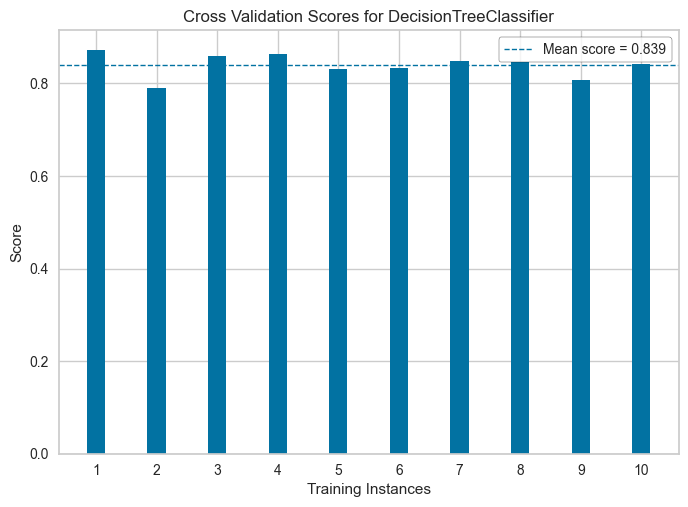

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    DecisionTreeClassifier(
    criterion= "entropy", max_depth=10, 
                                 min_samples_split=2,min_samples_leaf=10, 
                                 random_state=42
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(x_train, y_train)
oz.poof();

In [115]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1],
    # 'colsample_bytree': [0.6, 0.8, 1],
    # 'reg_alpha': [0, 0.5, 1],
    # 'reg_lambda': [1, 2, 3]
}

In [116]:
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                        param_grid=param_grid, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=0, 
                        n_jobs=-1)

grid_xgb.fit(x_train, y_train)

print("Best score:", grid_xgb.best_score_)
print("Best params:", grid_xgb.best_params_)

Best score: 0.8449412751332973
Best params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [119]:
xgb_model= XGBClassifier( learning_rate= 0.01, 
                                 max_depth= 7, n_estimators= 200, 
                                 subsample= 0.8,
                                 random_state=42)
xgb_model.fit(x_train, y_train)
print("train_accuracy:", xgb_model.score(x_train,y_train))
print("test_accuracy: ", xgb_model.score(x_test,y_test))


train_accuracy: 0.8644310690742333
test_accuracy:  0.8737113402061856


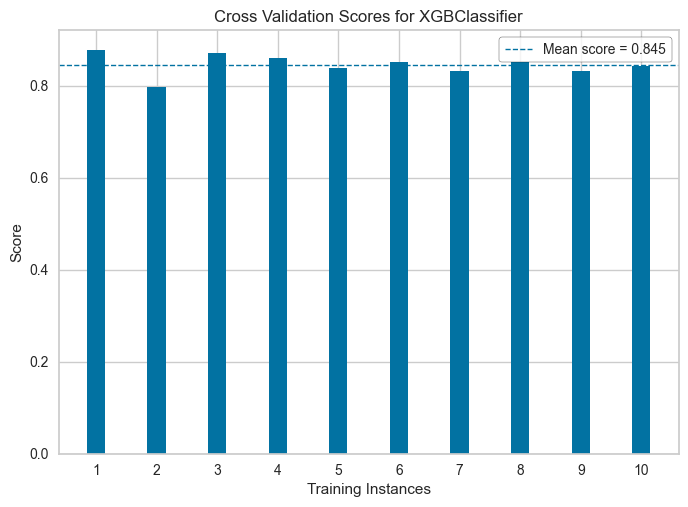

In [121]:
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    XGBClassifier(
      learning_rate= 0.01, 
                                 max_depth= 7, n_estimators= 200, 
                                 subsample= 0.8,
                                 random_state=42
    ),
    ax=ax,
    cv=cv,
    scoring='accuracy'
)

# Fit and visualize
oz.fit(x_train, y_train)
oz.poof();

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tüm modellerin skorlarını toplamak için liste
model_results = []

# SVM Performansı
svm_test_pred = svm.predict(x_test)
model_results.append({
    'Model': 'SVM',
    'Train Accuracy': svm.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, svm_test_pred),
    'Precision': precision_score(y_test, svm_test_pred, average='weighted'),
    'Recall': recall_score(y_test, svm_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, svm_test_pred, average='weighted')
})

# Decision Tree Performansı
dt_test_pred = dt_model.predict(x_test)
model_results.append({
    'Model': 'Decision Tree',
    'Train Accuracy': dt_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, dt_test_pred),
    'Precision': precision_score(y_test, dt_test_pred, average='weighted'),
    'Recall': recall_score(y_test, dt_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, dt_test_pred, average='weighted')
})

# Random Forest Performansı
rf_test_pred = rf_model.predict(x_test)
model_results.append({
    'Model': 'Random Forest',
    'Train Accuracy': rf_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, rf_test_pred),
    'Precision': precision_score(y_test, rf_test_pred, average='weighted'),
    'Recall': recall_score(y_test, rf_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, rf_test_pred, average='weighted')
})

# XGBoost Performansı
xgb_test_pred = xgb_model.predict(x_test)
model_results.append({
    'Model': 'XGBoost',
    'Train Accuracy': xgb_model.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, xgb_test_pred),
    'Precision': precision_score(y_test, xgb_test_pred, average='weighted'),
    'Recall': recall_score(y_test, xgb_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, xgb_test_pred, average='weighted')
})

knn_test_pred = knn.predict(x_test)
model_results.append({
    'Model': 'KNN',
    'Train Accuracy': knn.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, knn_test_pred),
    'Precision': precision_score(y_test, knn_test_pred, average='weighted'),
    'Recall': recall_score(y_test, knn_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, knn_test_pred, average='weighted')
})

logreg_test_pred = logreg.predict(x_test)
model_results.append({
    'Model': 'Log Reg',
    'Train Accuracy': logreg.score(x_train, y_train),
    'Test Accuracy': accuracy_score(y_test, logreg_test_pred),
    'Precision': precision_score(y_test, logreg_test_pred, average='weighted'),
    'Recall': recall_score(y_test, logreg_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, logreg_test_pred, average='weighted')
})

# Sonuçları bir DataFrame olarak göster
import pandas as pd
results_df = pd.DataFrame(model_results)
print(results_df.sort_values(by='Test Accuracy',ascending=[False]))

           Model  Train Accuracy  Test Accuracy  Precision    Recall  F1-Score
3        XGBoost        0.864431       0.873711   0.876431  0.873711  0.869117
2  Random Forest        0.864718       0.870275   0.878023  0.870275  0.863661
1  Decision Tree        0.857839       0.867698   0.871748  0.867698  0.862098
0            SVM        0.815420       0.824742   0.830844  0.824742  0.813248
4            KNN        0.930066       0.810997   0.808506  0.810997  0.803206
5        Log Reg        0.678991       0.702749   0.683960  0.702749  0.676350


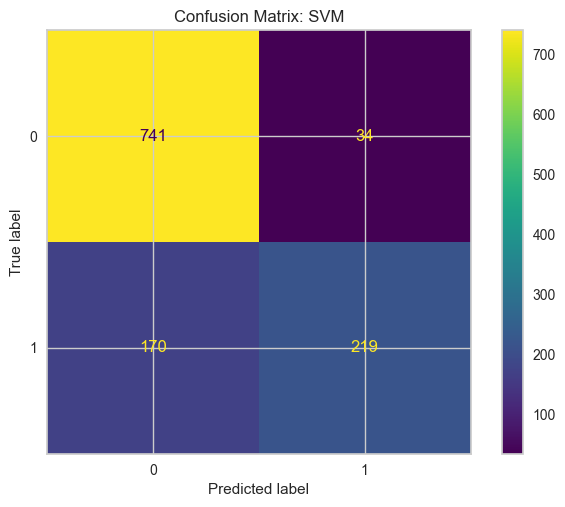

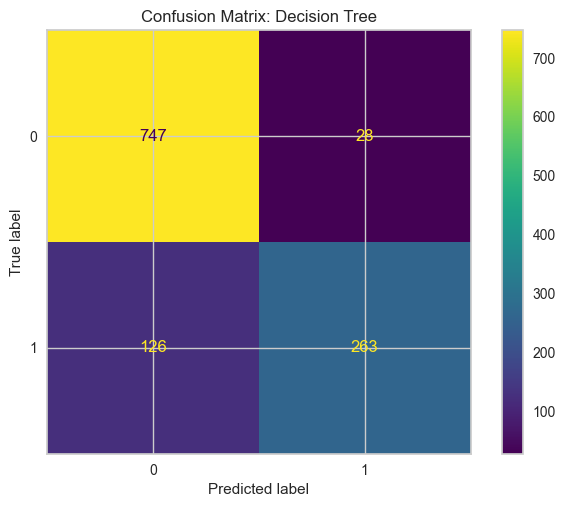

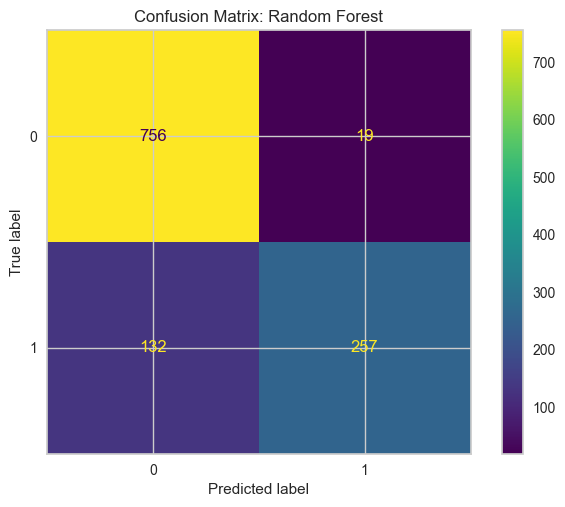

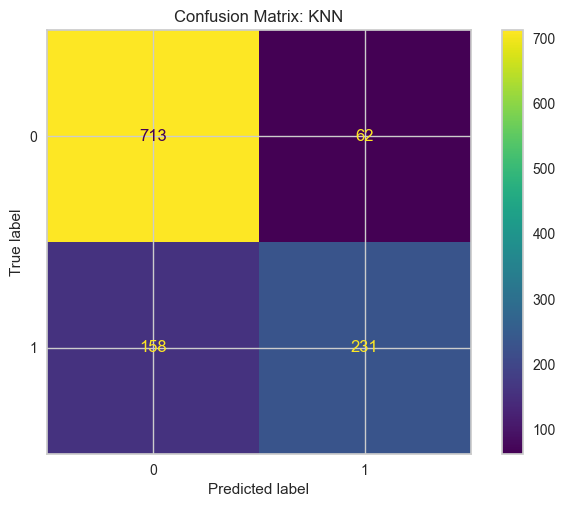

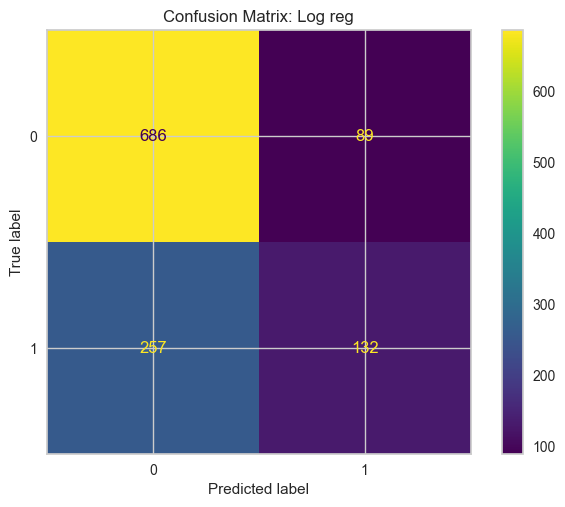

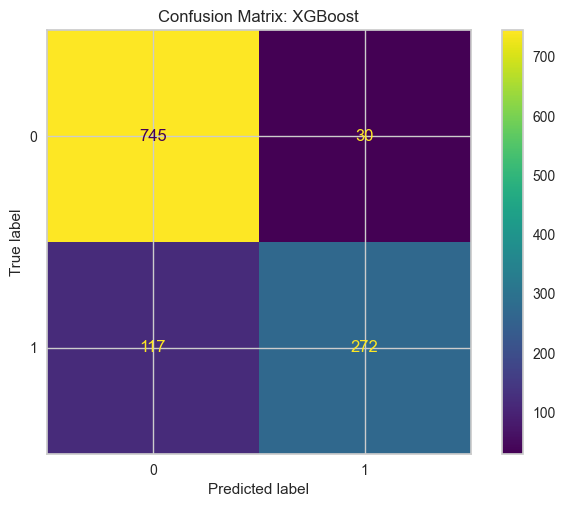

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [('SVM', svm_test_pred), 
          ('Decision Tree', dt_test_pred), 
          ('Random Forest', rf_test_pred), 
          ('KNN', knn_test_pred), 
          ('Log reg', logreg_test_pred), 
          ('XGBoost', xgb_test_pred)]

for model_name, predictions in models:
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()